<a href="https://colab.research.google.com/github/itzelmor02/Aprendizaje-de-Patrones-IMG/blob/main/Tarea_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enlace y captura de pantala del entrenamiento

> https://playground.tensorflow.org/#activation=sigmoid&batchSize=18&dataset=spiral&regDataset=reg-plane&learningRate=0.3&regularizationRate=0&noise=50&networkShape=3,3,3,1&seed=0.30072&showTestData=false&discretize=false&percTrainData=60&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


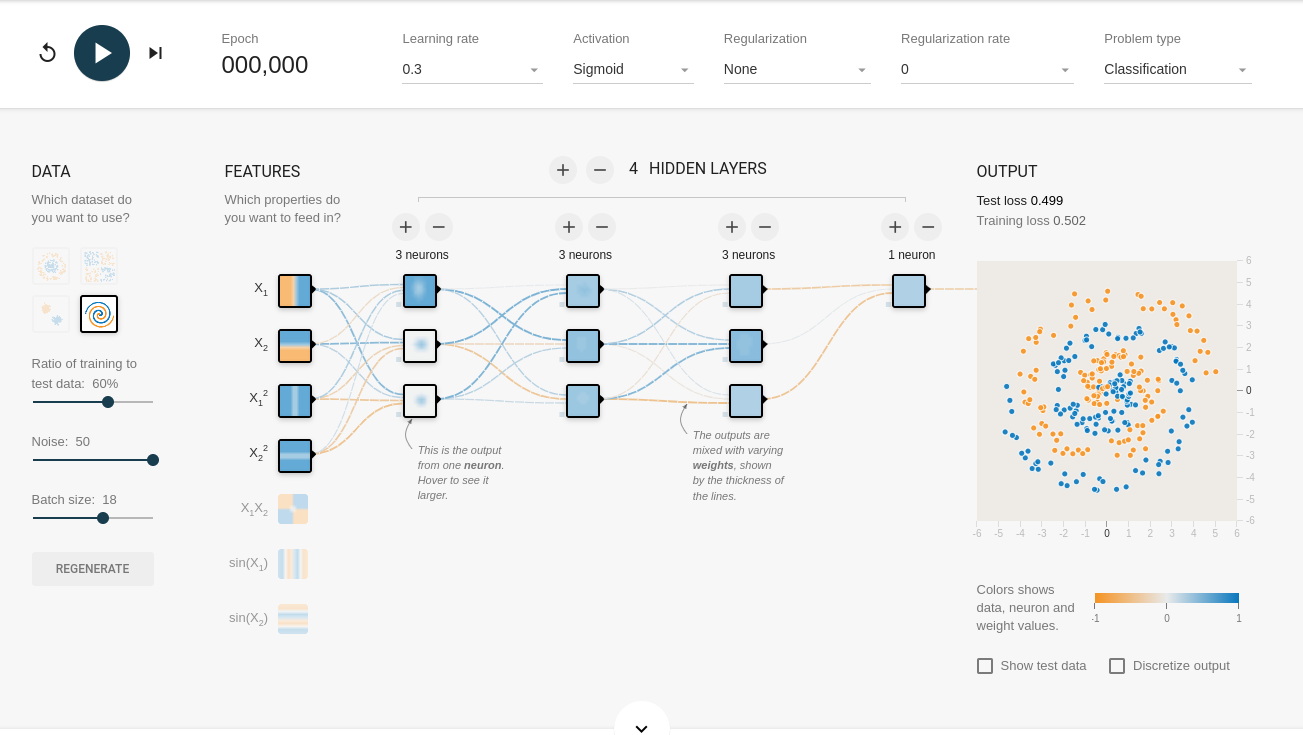

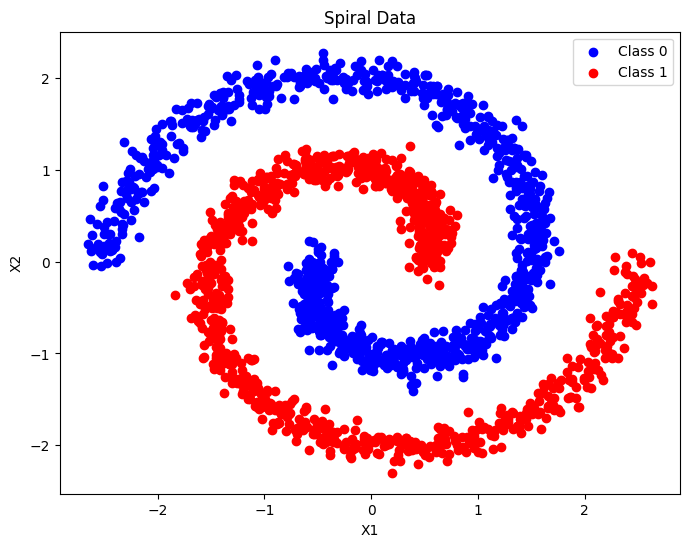

Epoch 1/100
67/67 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5025
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5025
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5025
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5025
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 8/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5025
Epoch 9/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 10/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5017
Epoch 11/

In [8]:
# Código de python
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Generamos los datos de la espiral
def generate_spiral_data(n_samples=1000, noise=0.1):
    r = np.linspace(0.5, 2.5, n_samples)
    theta = np.linspace(0, 2*np.pi, n_samples)

    x1 = r * np.cos(theta) + np.random.randn(n_samples) * noise
    y1 = r * np.sin(theta) + np.random.randn(n_samples) * noise
    label1 = np.ones(n_samples)

    x2 = -r * np.cos(theta) + np.random.randn(n_samples) * noise
    y2 = -r * np.sin(theta) + np.random.randn(n_samples) * noise
    label2 = np.zeros(n_samples)

    X = np.vstack([np.hstack([x1, x2]), np.hstack([y1, y2])]).T
    y = np.hstack([label1, label2])

    return X, y

# Generamos la gŕafica
X, y = generate_spiral_data(n_samples=1000, noise=0.1)
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Separamos en conjutno de test y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Escalamos las características a un rango entre 0 y 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Deifinimos la arquitectira de la red neuronal
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
learning_rate = 0.3
batch_size = 18
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=1)

# Evaluamos
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
